In [ ]:
import json
import os
import re
import bz2

from emoji import UNICODE_EMOJI
from langdetect import detect


ENGLISH_ONLY = True
NO_RT = True
LEN_LIMIT = None
REMOVE_EMOJI = True


work_dir = r"C:\Users\Leo's PC\Desktop\JS_Folder"
content = []


def checkEng(text:str):
    if ENGLISH_ONLY:
        return detect(text) == 'en'
    else:
        return True


def checkRT(text:str):
    if NO_RT:
        return not text.startswith('RT')
    else:
        return True


def checkLen(text:str):
    if LEN_LIMIT is not None:
        return len(text) >= LEN_LIMIT
    else:
        return True


def removeEmojis(data):

    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    return re.sub(emoj, '', data)


for root, _, filenames in os.walk(work_dir):

    for filename in filenames:

        filedir = os.path.join(root, filename)
        print("processing", filedir)
        
        with bz2.open(filedir) as f:

            for line in f:
                tweet = json.loads(line)

                try:
                    tweet = tweet["text"]

                    try:
                        if checkEng(tweet) and checkRT(tweet) and checkLen(tweet):
                            if REMOVE_EMOJI:
                                tweet = removeEmojis(tweet)

                            content.append(tweet)
                    except: # handle No language feature error
                        pass
                    
                except KeyError:
                    pass


print(len(content), 'Tweets gathered')

In [128]:
for i in content[:500]:
    print(i)

 #GASEN means. 

All senate committees being chaired by Dems!

No more Mitch blocking bills, Gr… https://t.co/hBVZvr7crC
@TreyGibbs28 @JoanofAmerica @SidneyPowell1 @GenFlynn @realDonaldTrump @Paul_Smithfr @LLinWood So they all get pardo… https://t.co/Q0SE6gJEW6
2020 was bad enough let's not have 2021 start out like this 
@damnit_mann Im so hype seeing a mayor with an Afro https://t.co/eYWlXbSKdO
@oneplus Which mobile device that I wish to have and dreamed of?
@chiewui you toooo!!
@moonboyblues let’s just keep it that way
The same ANC gov that has been in power for years chose to not believe in Science and our brothers and sisters died… https://t.co/wNUQnmz4MU
@SphaYoko The only time I don't wanna touch my meat https://t.co/itwGDwQemM
@min5raes LAN YAPSA VAR YA HAVASINDAN GEÇİLMEZ ARTIK HER SANİYE BİŞİ YAPAR, MONBEBE KASLARIMA BAKIN, MONBEBE KASLARIM NASIL AY ÇIĞLIK RESMEN
@RivanR7_ @FIFACrusher Van 21
@Mayank04086289 @BlankPaperBoy @Akash__Anshuman @ESPNcricinfo Yep I have a filter, it

In [1]:
import json
import os
import re
import bz2

from multiprocessing import cpu_count, Pool
from langdetect import detect


ENGLISH_ONLY = True
NO_RT = True
LEN_LIMIT = None
REMOVE_EMOJI = True

work_dir = r"C:\Users\Leo's PC\Desktop\JS_Folder"


def process(filedir:str):
    print("processing", filedir)
    content = []

    with bz2.open(filedir) as f:

        for line in f:
            tweet = json.loads(line)

            try:
                tweet = tweet["text"]

                try:
                    if checkEng(tweet) and checkRT(tweet) and checkLen(tweet):
                        if REMOVE_EMOJI:
                            tweet = removeEmojis(tweet)

                        content.append(tweet)
                except: # handle No language feature error
                    pass
                
            except KeyError:
                pass
    return content

dir_list = []

for root, _, filenames in os.walk(work_dir):
    for filename in filenames:
        dir_list.append(os.path.join(root, filename))

print(len(dir_list), "files found.")


print("threading across {} cpu".format(cpu_count()))
pool = Pool(len(dir_list))
tweet_list = pool.map(process, dir_list)

print(len(tweet_list), 'Tweets gathered')

91 files found.
threading across 32 cpu


In [1]:
from threading import Thread

for task in dir_list:
    t = Thread(target=process, args=(task,))
    t.start()

NameError: name 'dir_list' is not defined

In [2]:
import csv

with open(r"C:\Users\Leo's PC\Desktop\JS_Folder\generic_tweets_unshortened.csv", encoding="utf-8") as f:
    reader = csv.reader(f)
    data = list(reader)

In [4]:
print(data[0])

['K', 'C', ' ', 'a', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'S', 'u', 'n', 's', 'h', 'i', 'n', 'e', ' ', 'B', 'a', 'n', 'd', ' ', '-', ' ', 'K', 'e', 'e', 'p', ' ', 'I', 't', ' ', 'C', 'o', 'm', 'i', 'n', "'", ' ', 'L', 'o', 'v', 'e']


100%|██████████| 6505758/6505758 [00:52<00:00, 124911.07it/s]
2039992
id fuck a man who says he loves me idc if he smell like he just got done sitting in a tree stand for 6 hours
my baby do not feel good  he gonna have me up alllll night
@zyuxbubu THANK YOU SM

#SMTOWN_LIVE_Culture_Humanity  
#SMTOWN_LIVE  #SMTOWN  
@SMTOWNGLOBAL
@redvelfess THANK YOU SM

#SMTOWN_LIVE_Culture_Humanity  
#SMTOWN_LIVE  #SMTOWN  
@SMTOWNGLOBAL
@doyou_bangtan @kookiechimm @kookiechimm OMG finally.  Happy New Year 
@Ajarncom Sounds like a situation I've lived a 100 times when going around with my Thai family. Last time in Sattah… https://t.co/friz662iR1
@for_togheter @kaira_slaysss @Diviii123 @Shivinite @Shiviholic_ @Dia_momo26 @Love_You_Zndagi @7Shivin_shipper… https://t.co/f0uiB4zZWv
 Melbourne Renegades v Sydney Thunder 

We start 2021 with an excellent #BBL10 game! 

 Our cricket expert The E… https://t.co/XKbJpXH4A7
My irls are so funny how do you post infographics on wearing masks and properly social 

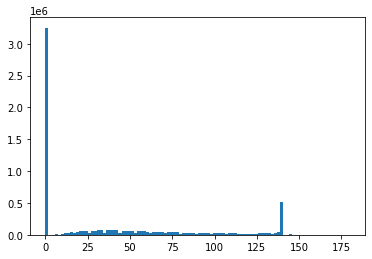

In [18]:
import tqdm
from matplotlib import pyplot as plt

LEN_LIMIT = 50
UNFINISHED_LIMIT = True

def checkLen(text:str):
    if LEN_LIMIT is not None:
        return len(text) >= LEN_LIMIT
    else:
        return True


def checkLUnfinished(text:str):
    if UNFINISHED_LIMIT:
        return not text.endswith("...")
    else:
        return True


tweet_list = []
len_stats = []
for tweet in tqdm.tqdm(data):
    len_stats.append(len(tweet))
    output = ""
    for character in tweet:
        output += character
    if checkLen(output) and checkLUnfinished(output):
        tweet_list.append(output)

print(len(tweet_list))
for i in tweet_list[:10]:
    print(i)

plt.hist(len_stats, bins=100)
plt.show()

In [21]:
with open(r"C:\Users\Leo's PC\Desktop\JS_Folder\generic_tweets_shortened.csv", 'w', encoding="utf-8") as f:
    writer = csv.writer(f)
    for tweet in tweet_list:
        writer.writerow([tweet])

In [20]:
print(type(tweet_list[0]))

<class 'str'>


In [22]:
import pandas as pd 

f = pd.read_csv(open(r"C:\Users\Leo's PC\Desktop\JS_Folder\generic_tweets_shortened.csv", encoding="utf-8"))
print(f)

C:\ProgramData\Anaconda3\envs\pd\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
        id fuck a man who says he loves me idc if he smell like he just got done sitting in a tree stand for 6 hours
0        my baby do not feel good  he gonna have me up ...                                                          
1        @zyuxbubu THANK YOU SM\n\n#SMTOWN_LIVE_Culture...                                                          
2        @redvelfess THANK YOU SM\n\n#SMTOWN_LIVE_Cultu...                                                          
3        @doyou_bangtan @kookiechimm @kookiechimm OMG f...                                                          
4        @Ajarncom Sounds like a situation I've lived a...                                                          
...                                                    ...                   

In [5]:
def checkLUnfinished(text:str):
    if True:
        return not ("... http" in text)
    else:
        return True

checkLUnfinished("need a fraud division… https://t.co/YpA6H6Q272")

True